In [3]:
from datasets import load_dataset
import torch
from pathlib import Path
from cobra import load

hf_token = Path("/home/agf64/project/thinking_cobra/.hf_token").read_text().strip()
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using GPU")
else:
    device = torch.device('cpu')
# In case your GPU does not support bf16
dtype = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16

# Load a pretrained VLM (either local path, or ID to auto-download from the HF Hub)
model_id = "cobra+3b"
vlm = load(model_id, hf_token=hf_token)
vlm.to(device, dtype=dtype)

Using GPU


11/14 [01:02:12] INFO     | >> [*] Downloading `cobra+3b from HF Hub                                     ]8;id=236859;file:///home/agf64/project/thinking_cobra/cobra/models/load.py\load.py]8;;\:]8;id=368729;file:///home/agf64/project/thinking_cobra/cobra/models/load.py#61\61]8;;\

                 INFO     | >> [*] Found Config =>> Loading & Freezing cobra+3b with:                    ]8;id=568739;file:///home/agf64/project/thinking_cobra/cobra/models/load.py\load.py]8;;\:]8;id=637750;file:///home/agf64/project/thinking_cobra/cobra/models/load.py#73\73]8;;\
                                       Vision Backbone =>> dinosiglip-vit-so-384px                                 
                                       LLM Backbone    =>> mamba-2.8b-zephyr                                       
                                       Arch Specifier  =>> no-align+fused-gelu-mlp                                 
                                       Checkpoint Path =>>                                                         
                          `/home/agf64/.cache/huggingface/hub/models--han1997--cobra/snapshots/7e3fb02b4           
                          f9291f6dcc0e9143ada0e5d7239372d/cobra+3b/checkpoints/latest-checkpoint.pt`               

                 INFO     | >> [*] Loading Vision Backbone dinosiglip-vit-so-384px                       ]8;id=221759;file:///home/agf64/project/thinking_cobra/cobra/models/load.py\load.py]8;;\:]8;id=893692;file:///home/agf64/project/thinking_cobra/cobra/models/load.py#82\82]8;;\

11/14 [01:02:17] INFO     | >> Loading pretrained weights from Hugging Face hub                     ]8;id=74651;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_builder.py\_builder.py]8;;\:]8;id=953693;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_builder.py#186\186]8;;\
                          (timm/vit_large_patch14_reg4_dinov2.lvd142m)                                             

                 INFO     | >>  Safe alternative available for 'pytorch_model.bin' (as                  ]8;id=31306;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_hub.py\_hub.py]8;;\:]8;id=996140;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_hub.py#180\180]8;;\
                          'model.safetensors'). Loading weights using safetensors.                                 

                 INFO     | >> Resized position embedding: (37, 37) to (27, 27).                    ]8;id=949467;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/layers/pos_embed.py\pos_embed.py]8;;\:]8;id=751249;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/layers/pos_embed.py#55\55]8;;\

11/14 [01:02:23] INFO     | >> Loading pretrained weights from Hugging Face hub                     ]8;id=295028;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_builder.py\_builder.py]8;;\:]8;id=660819;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_builder.py#186\186]8;;\
                          (('timm/ViT-SO400M-14-SigLIP-384', 'open_clip_pytorch_model.bin'))                       

                 INFO     | >>  Safe alternative available for 'open_clip_pytorch_model.bin' (as        ]8;id=739466;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_hub.py\_hub.py]8;;\:]8;id=613496;file:///home/agf64/project/.venv/lib/python3.10/site-packages/timm/models/_hub.py#180\180]8;;\
                          'open_clip_model.safetensors'). Loading weights using safetensors.                       

11/14 [01:02:24] INFO     | >> [*] Loading Pretrained LLM mamba-2.8b-zephyr via HF Transformers          ]8;id=742500;file:///home/agf64/project/thinking_cobra/cobra/models/load.py\load.py]8;;\:]8;id=704408;file:///home/agf64/project/thinking_cobra/cobra/models/load.py#89\89]8;;\

                 INFO     | >>     |=> Building empty mamba LLM from `xiuyul/mamba-2.8b-zephyr`     ]8;id=956631;file:///home/agf64/project/thinking_cobra/cobra/models/backbones/llm/base_llm.py\base_llm.py]8;;\:]8;id=394448;file:///home/agf64/project/thinking_cobra/cobra/models/backbones/llm/base_llm.py#129\129]8;;\

11/14 [01:02:57] INFO     | >>     |=> Loading mamba (Fast) Tokenizer via the AutoTokenizer API     ]8;id=943276;file:///home/agf64/project/thinking_cobra/cobra/models/backbones/llm/base_llm.py\base_llm.py]8;;\:]8;id=933456;file:///home/agf64/project/thinking_cobra/cobra/models/backbones/llm/base_llm.py#151\151]8;;\

                 INFO     | >> [*] Loading VLM cobra+3b from Checkpoint; Freezing Weights 🥶             ]8;id=780728;file:///home/agf64/project/thinking_cobra/cobra/models/load.py\load.py]8;;\:]8;id=524008;file:///home/agf64/project/thinking_cobra/cobra/models/load.py#98\98]8;;\

CobraVLM(
  (vision_backbone): DinoSigLIPViTBackbone(
    (dino_featurizer): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
        

In [4]:
dataset = load_dataset("lmms-lab/COCO-Caption", split="val")
user_prompt = "Please carefully observe the image and come up with a caption for the image."

# Build prompt
prompt_builder = vlm.get_prompt_builder()
prompt_builder.add_turn(role="human", message=user_prompt)
prompt_text = prompt_builder.get_prompt()

In [89]:
ref_captions = {}
generated_captions = {}

for idx, example in enumerate(dataset.select()):
    image_id = idx
    image = example["image"]
    caption = example["answer"]
    ref_captions[image_id] = caption
    generated_text = vlm.generate(
        image,
        prompt_text,
        use_cache=True,
        do_sample=True,
        temperature=0.4,
        max_new_tokens=512,
    )
    generated_captions[idx] = [generated_text]


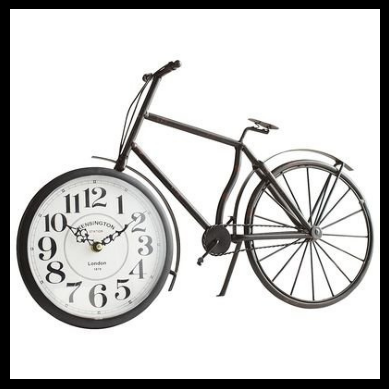

Ground truth captions:
['A bicycle replica with a clock as the front wheel.', 'The bike has a clock as a tire.', 'A black metal bicycle with a clock inside the front wheel.', 'A bicycle figurine in which the front wheel is replaced with a clock\n', 'A clock with the appearance of the wheel of a bicycle ']
Predicted captions:
['A black bicycle-shaped clock with a white face, black numbers, and black hands, featuring a London landmark.']


In [90]:
from matplotlib import pyplot as plt

example = dataset[0]
image = example["image"]

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

print("Ground truth captions:")
print(ref_captions[0])

print("Predicted captions:")
print(generated_captions[0])

In [93]:
# N = 1000
# ref_captions = {}
# generated_captions = {}

# for idx, example in enumerate(dataset.select(range(N))):
#     image_id = idx
#     image = example["image"]
#     caption = example["answer"]
#     ref_captions[image_id] = caption
#     generated_captions[idx] = [caption[1]]
#
# print(ref_captions[999])
# print('\n')
# print(generated_captions[999])


['A man sitting on a park bench next to a herd of sheep.', 'A man sitting on a park bench near some lambs', 'An older man sitting on a park bench looking at a sheep', 'A man is sitting on a bench and looking to the left.', 'An older man sitting on a bench looking at sheep']


['A man sitting on a park bench near some lambs']


In [96]:
from pycocoevalcap.bleu.bleu import Bleu

bleu_scorer = Bleu(4)  # Calculate BLEU scores up to 4-grams

bleu_scores, example_scores = bleu_scorer.compute_score(ref_captions, generated_captions)

num_captions = len(generated_captions)

with open("bleu_scores_output.txt", "w") as f:
    f.write(f"Number of generated captions: {num_captions}\n\n")
    f.write("BLEU Scores (BLEU-1 to BLEU-4):\n")
    f.write(str(bleu_scores) + "\n\n")  # Write the tuple of scores

    f.write(f"BLEU-1: {bleu_scores[0]:.4f}\n")
    f.write(f"BLEU-2: {bleu_scores[1]:.4f}\n")
    f.write(f"BLEU-3: {bleu_scores[2]:.4f}\n")
    f.write(f"BLEU-4: {bleu_scores[3]:.4f}\n\n")

    # Write paired captions
    for img_id in generated_captions:
        f.write(f"Image ID: {img_id}\n")
        f.write("Generated caption:\n")
        f.write(f"  {generated_captions[img_id][0]}\n")  # Hypothesis (one caption)
        f.write("Reference captions:\n")
        for ref in ref_captions[img_id]:
            f.write(f"  - {ref}\n")  # Multiple references possible
        f.write("\n")

print("BLEU scores and paired captions saved to bleu_scores_output.txt")


{'testlen': 10501, 'reflen': 10501, 'guess': [10501, 9501, 8501, 7501], 'correct': [10501, 9501, 8501, 7501]}
ratio: 0.9999999999999047
BLEU scores and paired captions saved to bleu_scores_output.txt
